<a href="https://colab.research.google.com/github/vashishtmegha/Covid-Prediction/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Proposal
##Machine learning-based prediction of COVID-19

##Introduction:
Covid19 is a global pandemic that has affected millions of lives and livelihood.It is respiratory disease having mild to severe symptoms such as fever,sore throat, headche,cough,shortness of breath. The following project uses data from 11th March 2020 till 30th April 2020. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable of covid result test is either positive or negative.The aim of this project is to use data science techniques to answer some of the key questions related to Covid19 and provide insight for decision making.
##The main questions that this project will attempt to answer are:
1.Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  

Our Proposal is important as it helps in early diagnosis,treatment and prevention of the Covid19.Predicting a disease accurately can improve medical treatment by providing timely and personalized interventions reducing the risk of complications and enhancing the quality of life of patients.Moreover disease prediction can help in identifying the risk factors ,causes and pattern of disease which can inform healthcare and thus they can take action accordingly.
..............................................................................
2.How is it going to impact the medical field when it comes to effective screening and reducing health care burden?

By predicting the disease can have positive impact on medical field by enabling screening and reducing health care burden.Effective screening can help in detecting diseases at an early stage where they are more treatable and curable.This help in preventing the spread of the contagious Covid19 disease, thus reducing the health care burden and reducing the cost,resources and saving time of healthcare providers which they can invest on other patients.
................................................................................
3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.
 There are several gaps in the knowledge and challenges infield of disease prediction such as:
 1.the lack of sufficient,reliable and standardized data for training and testing machine learning models.
 2. The difficulty of interpreting and explaining the results and decisions of machine learning models for some rare diseases.
 Our proposed method helps in addressing some of the gaps by using learning Algorithms and evaluate the performance by checking the accuracy using cross validation methods,confusion matrix and also applying the methods such as hypertunning for improving the accuracy.


#Hypothesis
1. DecisionTree classifier is better than RandomForest Classifier.
2.Fever is not correlated with target variable(corona virus).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


##Approach

In [ ]:
#load the data into pandas dataframe
df=pd.read_csv('/content/corona_tested_006.csv')

<ipython-input-2-7152b17abb14>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/corona_tested_006.csv')


#Data Exploration

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
#extract first five rows
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


From data expolartion we come to know the above data is categorical

In [ ]:
df.shape  #gives the number of rows and columns

(278848, 11)

In [ ]:
df.isnull().sum() # total number of null values in each column



Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

#Data Preprocessing(cleaning the data,removing the null values)

In [ ]:
for i in df:
  print(i,':',df[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['TRUE' 'FALSE' 'None' False True]
Fever : ['FALSE' 'TRUE' 'None' False True]
Sore_throat : ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath : ['FALSE' 'TRUE' 'None' False True]
Headache : ['FALSE' 'TRUE' 'None' False True]
Corona : 

Data cleaning

In [ ]:
df['Test_date']=pd.to_datetime(df['Test_date'])

<ipython-input-8-4bd0b977ef06>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Test_date']=pd.to_datetime(df['Test_date'])


In [ ]:
#data understanding(explore,clean the data)
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x:x.lower() if isinstance(x,str)else x )
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x:'false'if x==False else x)
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x:'true' if x==True else x)


In [ ]:
#replace the null values with mode
df['Cough_symptoms']=df['Cough_symptoms'].replace('none',df['Cough_symptoms'].mode()[0])

In [ ]:

df['Fever']=df['Fever'].apply(lambda x:x.lower() if isinstance(x,str)else x)
df['Fever']=df['Fever'].apply(lambda x:'false' if x==False else x)
df['Fever']=df['Fever'].apply(lambda x:'true' if x==True else x)


In [ ]:
df['Fever'].unique()

array(['false', 'true', 'none'], dtype=object)

In [ ]:
#replace the null values with mode
df['Fever']=df['Fever'].replace('none',df['Fever'].mode()[0])

In [ ]:
df['Fever'].unique()

array(['false', 'true'], dtype=object)

In [ ]:
df['Sore_throat']=df['Sore_throat'].apply(lambda x:x.lower() if isinstance(x,str)else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x:'false' if x==False else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x:'true' if x==True else x)



In [ ]:
#replace the null values with mode
df['Sore_throat']=df['Fever'].replace('none',df['Sore_throat'].mode()[0])

In [ ]:
df['Sore_throat'].unique()

array(['false', 'true'], dtype=object)

In [ ]:
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x:x.lower() if isinstance(x,str)else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x:'false' if x==False else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x:'true' if x==True else x)


In [ ]:
df['Shortness_of_breath']=df['Shortness_of_breath'].replace('none',df['Shortness_of_breath'].mode()[0])


In [ ]:
df['Shortness_of_breath'].unique()

array(['false', 'true'], dtype=object)

In [ ]:
df['Headache']=df['Headache'].apply(lambda x:x.lower() if isinstance(x,str)else x)
df['Headache']=df['Headache'].apply(lambda x:'false' if x==False else x)
df['Headache']=df['Headache'].apply(lambda x:'true' if x==True else x)


In [ ]:
df['Headache']=df['Headache'].replace('none',df['Headache'].mode()[0])




In [ ]:
df['Headache'].unique()

array(['false', 'true'], dtype=object)

In [ ]:
df['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [ ]:
df['Sex']=df['Sex'].replace('None',df['Sex'].mode()[0])


In [ ]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
df['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [ ]:
df['Age_60_above'].mode()[0]

'None'

In [ ]:
df['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['Ind_ID'],df['Corona'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print('Chi-square statistics:',chi2)
print('p-value:',p_value)

Chi-square statistics: 557696.0
p-value: 0.4989926858368912


As from above code we can see that p value is very high than critical value(0.05),thus Ind_ID column is not related with target variable(Corona)

In [ ]:
# drop the IND_ID feature as it is not related to target variable(Corona)
new_df=df.drop('Ind_ID',axis=1)

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df',new_df)


In [ ]:
# number of corona patients who faced shortness of breath.
conn.execute("Select COUNT(*) as Corona_patients_shortness_breath from new_df where corona='positive' and shortness_of_breath='true'").fetchdf()

,Corona_patients_shortness_breath
0,1164


There are 1164 Corona positive patients who faced shortness of breath.

In [ ]:
# number of negative corona patients who have fever and sore_throat.
conn.execute("Select COUNT(*) as count from new_df where corona='negative' and fever='true' and sore_throat='true'").fetchdf()


,count
0,14853


There were 15816 people who were corona negative and who had fever and sore_throat.

In [ ]:
#Group the data by month and rank the number of positive cases.

conn.execute("Select  MONTHNAME(Test_date) as test_month ,Count(Corona) as positive_cases ,RANK() OVER(Order BY Count(Corona) DESC) as rank FROM new_df where corona='positive' GROUP BY test_month ORDER BY rank").fetchdf()

,test_month,positive_cases,rank
0,March,6283,1
1,April,3746,2
2,January,682,3
3,February,615,4
4,May,505,5
5,July,483,6
6,June,394,7
7,October,356,8
8,November,331,9
9,December,330,10


In above query we have seen that there are maximum cases of corona positive in the month of March with record of 6283 cases followed by 4188 cases  recorded in April and least cases are recorded in month of August.

In [ ]:
#female negative corona patients who faced cough and headache
conn.execute("Select * from new_df where corona='negative' and Cough_symptoms='true' and headache='true'and Sex='female'").fetchdf()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-12-03,true,true,true,false,true,negative,None,female,Abroad
1,2020-12-03,true,true,true,false,true,negative,None,female,Other
2,2020-12-03,true,false,false,false,true,negative,None,female,Abroad
3,2020-03-13,true,true,true,false,true,negative,None,female,Abroad
4,2020-03-13,true,false,false,false,true,negative,None,female,Abroad
5,2020-03-13,true,true,true,false,true,negative,None,female,Abroad
6,2020-03-13,true,false,false,false,true,negative,None,female,Contact with confirmed
7,2020-03-13,true,false,false,false,true,negative,None,female,Contact with confirmed
8,2020-03-13,true,false,false,false,true,negative,None,female,Contact with confirmed
9,2020-03-13,true,false,false,false,true,negative,None,female,Contact with confirmed


There are total 59 females who were tested Corona negative but faced cough and headche

In [ ]:
#Number of elderly corona patients have faced breathing problems

conn.execute("Select count(*) as count from new_df where Age_60_above='Yes' and Shortness_of_breath='true'").fetchdf()

,count
0,292


There are 292 corona positive senior citizens who faced breathing problems

In [ ]:
# three symptoms that were more common among COVID positive patients


conn.execute("Select Cough_symptoms,fever,sore_throat,Shortness_of_breath,Headache,count(*) as symptom_count from new_df where Corona='positive'  Group by Cough_symptoms,fever,Sore_throat,Shortness_of_breath,Headache order by symptom_count desc").fetchdf()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,symptom_count
0,false,false,false,false,false,5174
1,true,true,true,false,false,2334
2,true,false,false,false,false,2293
3,false,true,true,false,false,1454
4,true,true,true,false,true,664
5,false,false,false,false,true,431
6,true,false,false,false,true,398
7,false,true,true,false,true,375
8,true,true,true,true,false,337
9,true,false,false,true,false,190


From the above code, first row indicates that  there are 5511 people which were corona positive but none of the symptom appears in them where as  three more common symptoms in corona patients were Cough_symptoms,fever  and sore_throat with count of 2365.

In [ ]:
#symptom that was less common among COVID negative people

conn.execute("Select Cough_symptoms,fever,sore_throat,Shortness_of_breath,Headache,count(*) as symptom_count from new_df where Corona='negative'  Group by Cough_symptoms,fever,Sore_throat,Shortness_of_breath,Headache order by symptom_count asc").fetchdf()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,symptom_count
0,false,true,true,true,true,2
1,false,false,false,true,true,8
2,true,true,true,true,true,11
3,true,false,false,true,true,11
4,false,true,true,false,true,20
5,true,false,false,false,true,29
6,false,false,false,false,true,29
7,true,true,true,false,true,37
8,false,true,true,true,false,45
9,true,true,true,true,false,65


In the above code  first line indicates that there were only 2 persons who tested negative but had all the symptoms although this is very rare among negative cases,second row indicates that there were only 8 persons which have symptoms shortness of breath and headche.

In [ ]:
# the most common symptoms among COVID positive males whose known contact was abroad?


conn.execute("Select Cough_symptoms,fever,sore_throat,Shortness_of_breath,Headache,count(*) as positive_count from new_df where Corona='positive' and Sex='male' and known_contact='Abroad'  Group by Cough_symptoms,fever,Sore_throat,Shortness_of_breath,Headache order by positive_count desc").fetchdf()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,positive_count
0,true,true,true,false,false,207
1,true,false,false,false,false,201
2,false,false,false,false,false,177
3,false,true,true,false,false,86
4,true,true,true,false,true,38
5,true,true,true,true,false,27
6,false,false,false,false,true,27
7,true,false,false,false,true,25
8,false,true,true,false,true,21
9,true,false,false,true,false,17


in the above code first row indicates there were 207 males who were tested positive had symptoms fever,cough and sore throat whereas 205 corona positive males had only fever.

<Axes: xlabel='Sex', ylabel='count'>

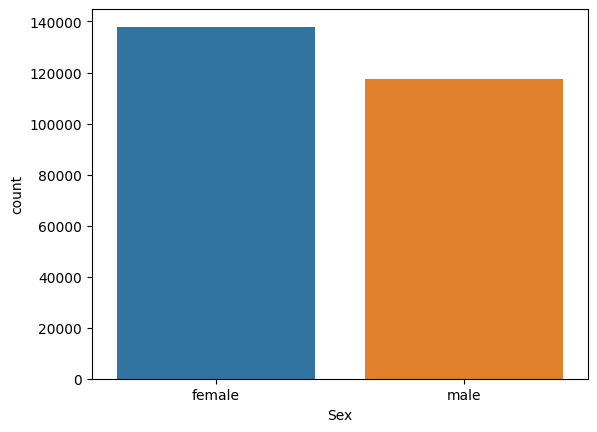

In [ ]:
sns.countplot(x='Sex',data=new_df)

Here we can visualize the number of females on which test was conducted were 15000 (approx) in number which was more than the count of males who were 13000(approx.) in number.

In [ ]:
px.imshow((pd.crosstab(new_df['Sex'],new_df['Corona'])))

There are 7519  males who are Corona positive and 7210 Corona positive females.

Feature Selection: Here feature selection is done using Statistics

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(new_df['Fever'],new_df['Corona'])
chi2,p_value,dof,expected=chi2_contingency(contingency_table)
print('Chi-square statistics:',chi2)
print('p-value:',p_value)

Chi-square statistics: 18927.892423715963
p-value: 0.0


The p value is less than 0.05,thus Fever is highly correlated with target variable(Corona)

We want to see whether 'Fever'is an important feature in predicting corona virus.This is done with the using statistics under filter method.Thus,in the above code we apply  chi2 test as data is categorical ,as p value should be less than 0.05,but here p value is approx 0.5 which indicates

#Modelling
In given dataset target variable 'corona' is categorical,thus we are using classification models such as decision classifier, randomforest classifier which are non-parametric models(that do not based on any assumptions)  

#Decision Tree classsifier

In [ ]:
X=new_df[['Fever','Cough_symptoms','Sore_throat','Headache','Shortness_of_breath','Sex']]
y=new_df['Corona']
#convert the categorical data into nominal variable using one hot encoding
X=pd.get_dummies(X,columns=['Fever','Cough_symptoms','Sore_throat','Headache','Shortness_of_breath','Sex'],drop_first=True)

#Separating data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Modelling
from sklearn.tree import DecisionTreeClassifier
model_tr=DecisionTreeClassifier()
model_tr.fit(X_train,y_train)
#make prediction on testing data
y_pred_test_dt=model_tr.predict(X_test)
y_pred_train_dt=model_tr.predict(X_train)

#evaluate the model performance
from sklearn.metrics import accuracy_score
test_accuracy_dt=accuracy_score(y_test,y_pred_test_dt)
train_accuracy_dt=accuracy_score(y_train,y_pred_train_dt)

print('test accuracy of test data:',test_accuracy_dt)
print('test accuracy of train data:',train_accuracy_dt)


test accuracy of test data: 0.9417608032992648
test accuracy of train data: 0.9425313119178045


As there is negligible difference between accuracy of test and train data, thus data is having optimum accuracy, it is neither underfit nor overfit.

#RandomForestClassifier:




In [ ]:
X=new_df[['Fever','Cough_symptoms','Sore_throat','Headache','Shortness_of_breath','Sex']]
y=new_df['Corona']
#convert the categorical data into nominal variable using one hot encoding
X=pd.get_dummies(X,columns=['Fever','Cough_symptoms','Sore_throat','Headache','Shortness_of_breath','Sex'],drop_first=True)

#Separating data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Modelling
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
#make prediction on testing data
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

#evaluate the model performance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

test_accuracy_RFC=accuracy_score(y_test,y_pred_test)
train_accuracy_RFC=accuracy_score(y_train,y_pred_train)


print('test accuracy of test data:',test_accuracy_RFC)
print('test accuracy of train data:',train_accuracy_RFC)
print('Cross Validation of score:',cross_val_score(model,X_train,y_train,cv=5).mean())




test accuracy of test data: 0.9417608032992648
test accuracy of train data: 0.9425313119178045
Cross Validation of score: 0.942531309398998


Our assumption is wrong that decision tree is better than random Forest. here both the models give almost the same accuracy that may be because data is too small.

We will apply different Machine Learning  such as Logistic and KNN algorithm and compare the accuracy  of all models to check which one is more accurate.

#Logistic regression:


In [ ]:
X=new_df[['Fever','Cough_symptoms','Headache','Shortness_of_breath','Sex']]
y=new_df['Corona']
#convert the categorical data into nominal variable using one hot encoding
X=pd.get_dummies(X,columns=['Fever','Cough_symptoms','Headache','Shortness_of_breath','Sex'],drop_first=True)

#Separating data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Modelling
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
#make prediction on testing data
y_pred_test=model.predict(X_test)

#evaluate the model performance
from sklearn.metrics import accuracy_score,classification_report
test_accuracy_lg=accuracy_score(y_test,y_pred_test)


print('test accuracy of test data:',test_accuracy_lg)
print("Classification report:",classification_report(y_test,y_pred_test))


test accuracy of test data: 0.941509772279003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:               precision    recall  f1-score   support

    negative       0.94      1.00      0.97     52041
       other       0.00      0.00      0.00       791
    positive       0.85      0.19      0.31      2938

    accuracy                           0.94     55770
   macro avg       0.60      0.40      0.43     55770
weighted avg       0.92      0.94      0.92     55770



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
new_df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
1,11-03-2020,false,true,true,false,false,positive,None,female,Abroad
2,11-03-2020,false,true,true,false,false,positive,None,female,Abroad
3,11-03-2020,true,false,false,false,false,negative,None,female,Abroad
4,11-03-2020,true,false,false,false,false,negative,None,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,false,false,false,false,false,positive,None,male,Other
278844,30-04-2020,false,false,false,false,false,negative,None,female,Other
278845,30-04-2020,false,false,false,false,false,negative,None,male,Other
278846,30-04-2020,false,false,false,false,false,negative,None,male,Other


#KNN

In [ ]:
X=new_df[['Fever','Cough_symptoms','Headache','Shortness_of_breath','Sex']]
y=new_df['Corona']
#convert the categorical data into nominal variable using one hot encoding
X=pd.get_dummies(X,columns=['Fever','Cough_symptoms','Headache','Shortness_of_breath','Sex'],drop_first=True)

#Separating data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Modelling
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
#make prediction on testing data
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

#evaluate the model performance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

test_accuracy_knn=accuracy_score(y_test,y_pred_test)
train_accuracy_knn=accuracy_score(y_train,y_pred_train)


print('test accuracy of test data:',test_accuracy_knn)
print('test accuracy of test data:',train_accuracy_knn)

print('Cross Validation of score:',cross_val_score(model,X_train,y_train,cv=5).mean())


test accuracy of test data: 0.9369912139142909
test accuracy of test data: 0.9378289208258994
Cross Validation of score: 0.9396399466589725


To improve the accuracy of model we can do pruning and hypertunning using Gridsearchcv.


We are using

##Hyperparameter Tuning:
It improves the model performance by avoiding the problem of overfitting or underfitting in KNN algorithm.

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":[1,2,3,4,5,6,7,8,9,15]}
grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'n_neighbors': 15}

In [ ]:
X=new_df[['Fever','Cough_symptoms','Headache','Shortness_of_breath','Sex']]
y=new_df['Corona']
#convert the categorical data into nominal variable using one hot encoding
X=pd.get_dummies(X,columns=['Fever','Cough_symptoms','Headache','Shortness_of_breath','Sex'],drop_first=True)

#Separating data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Modelling
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)
#make prediction on testing data
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

#evaluate the model performance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

test_accuracy_knn=accuracy_score(y_test,y_pred_test)
train_accuracy_knn=accuracy_score(y_train,y_pred_train)


print('test accuracy of test data:',test_accuracy_knn)
print('test accuracy of test data:',train_accuracy_knn)

print('Cross Validation of score:',cross_val_score(model,X_train,y_train,cv=5).mean())


test accuracy of test data: 0.9417070109377802
test accuracy of test data: 0.9425178637068649
Cross Validation of score: 0.9415316668090398


Comparison of accuracy of four models(Decision Tree,Random Forest,KNN,Logistic algorithm)

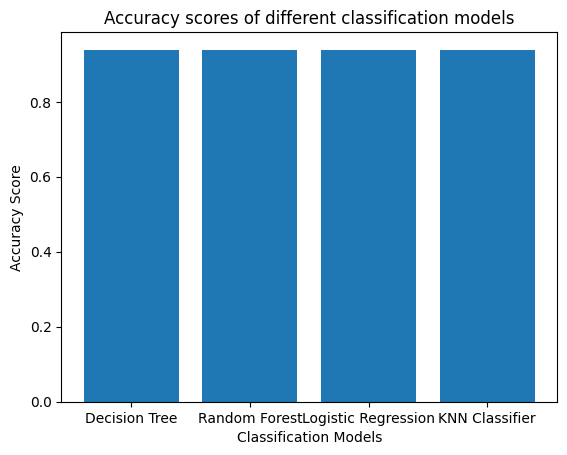

In [ ]:
#Create a bar plot with the accuracy scores for each model
models=['Decision Tree','Random Forest','Logistic Regression','KNN Classifier']
accuracies=[test_accuracy_dt,test_accuracy_RFC,test_accuracy_lg,test_accuracy_knn]
plt.bar(models,accuracies)
plt.title('Accuracy scores of different classification models')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')

plt.show()

Decision tree and RandomForest gives almost equal accuracy here followed by little variation in accuracy of KNN and Logistic algorithm and there is no problem of overfitting and underfitting here.

#Conclusion:
##Our model can acheive accuracy of 94% on the test dataset.Our model can predict the Corona positive cases on the basis of symptoms such as Sore throat,cough,headache,Shortness of breath,fever using ML models with 94%.It will help in detecting,preventing and controlling the corona virus and can assist in decision making or policy making for health authorities.